In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
%matplotlib inline

### Априорное - Бета распределение с параметрами альфа и бета
### Где альфа отвечает за количество выпадения орла, а бета - решки

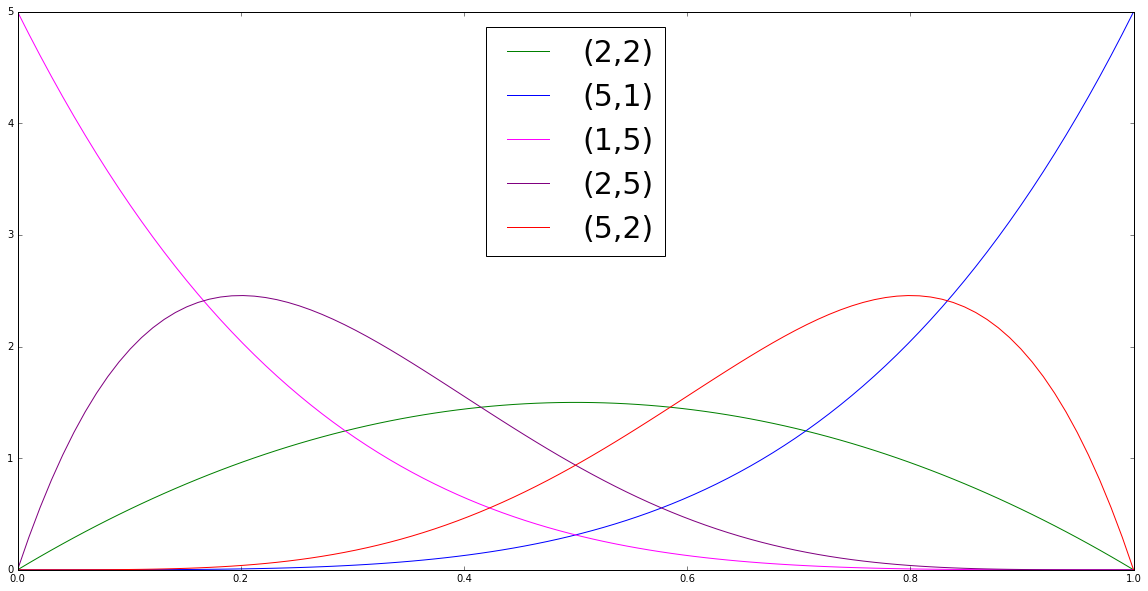

In [2]:
param = [[2,2],[5,1],[1,5],[2,5],[5,2]]
colors = ['green', 'blue', 'magenta', 'purple', 'red']

plt.figure(figsize=(20,10))
for j in range(5):
    plt.plot(np.linspace(0, 1, 100), sps.beta.pdf(np.linspace(0, 1, 100), a=param[j][0], b=param[j][1]),
             color=colors[j], label='('+str(param[j][0])+','+str(param[j][1])+')')
    
plt.legend(loc=0, fontsize=30)
plt.show()

### Для разных пар альфа и бета найдем байесовские оценки для нашего матожидания
### Оценка максимально правдоподобия - $\overline{X}$

In [3]:
our_probability = [0.5, 0.8, 0.1]

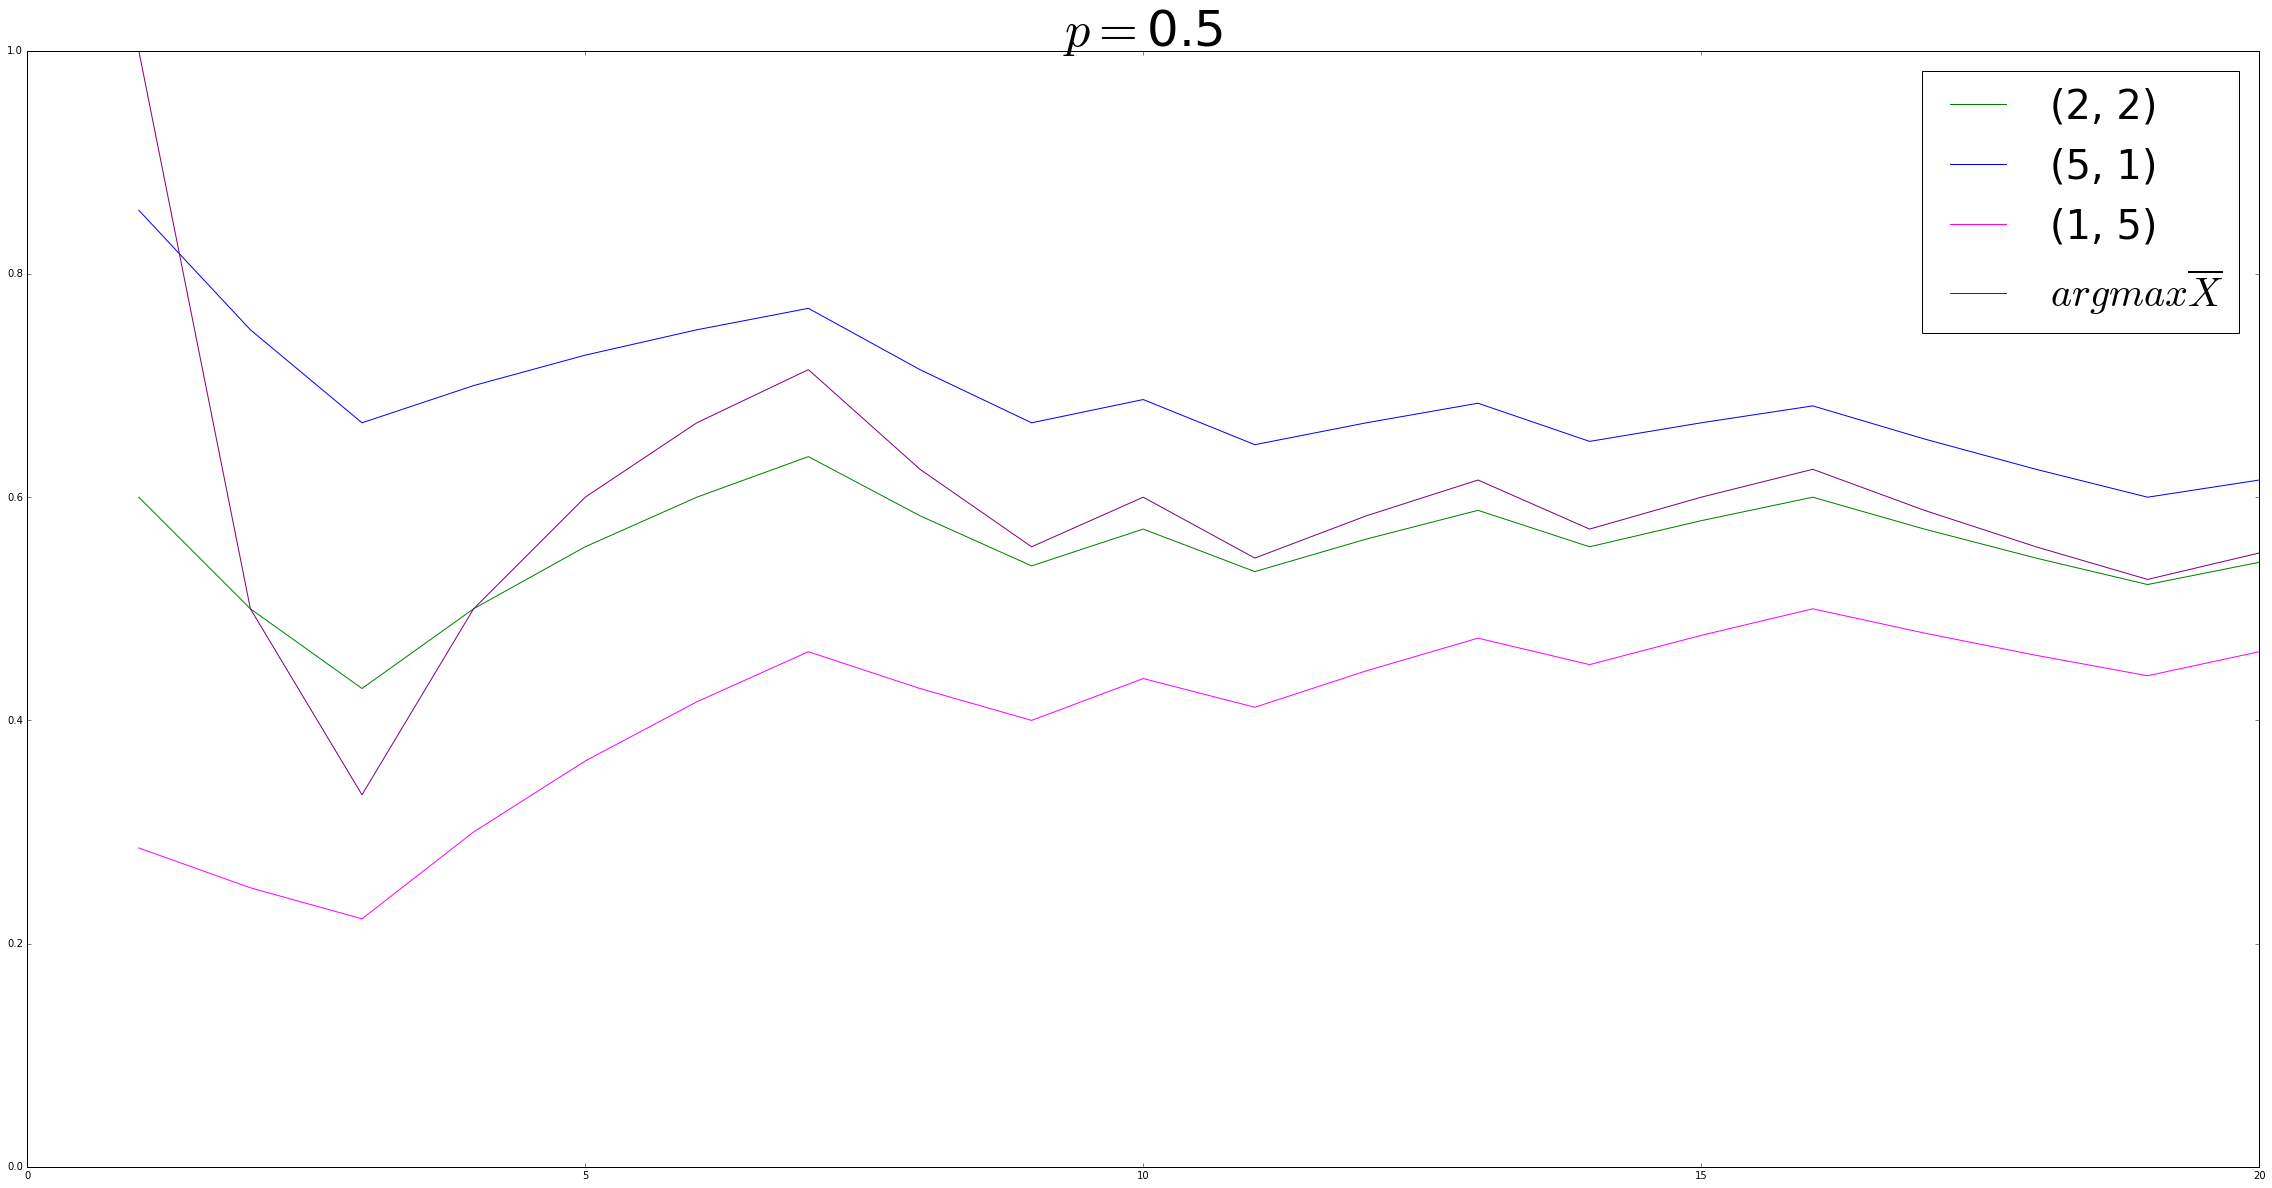

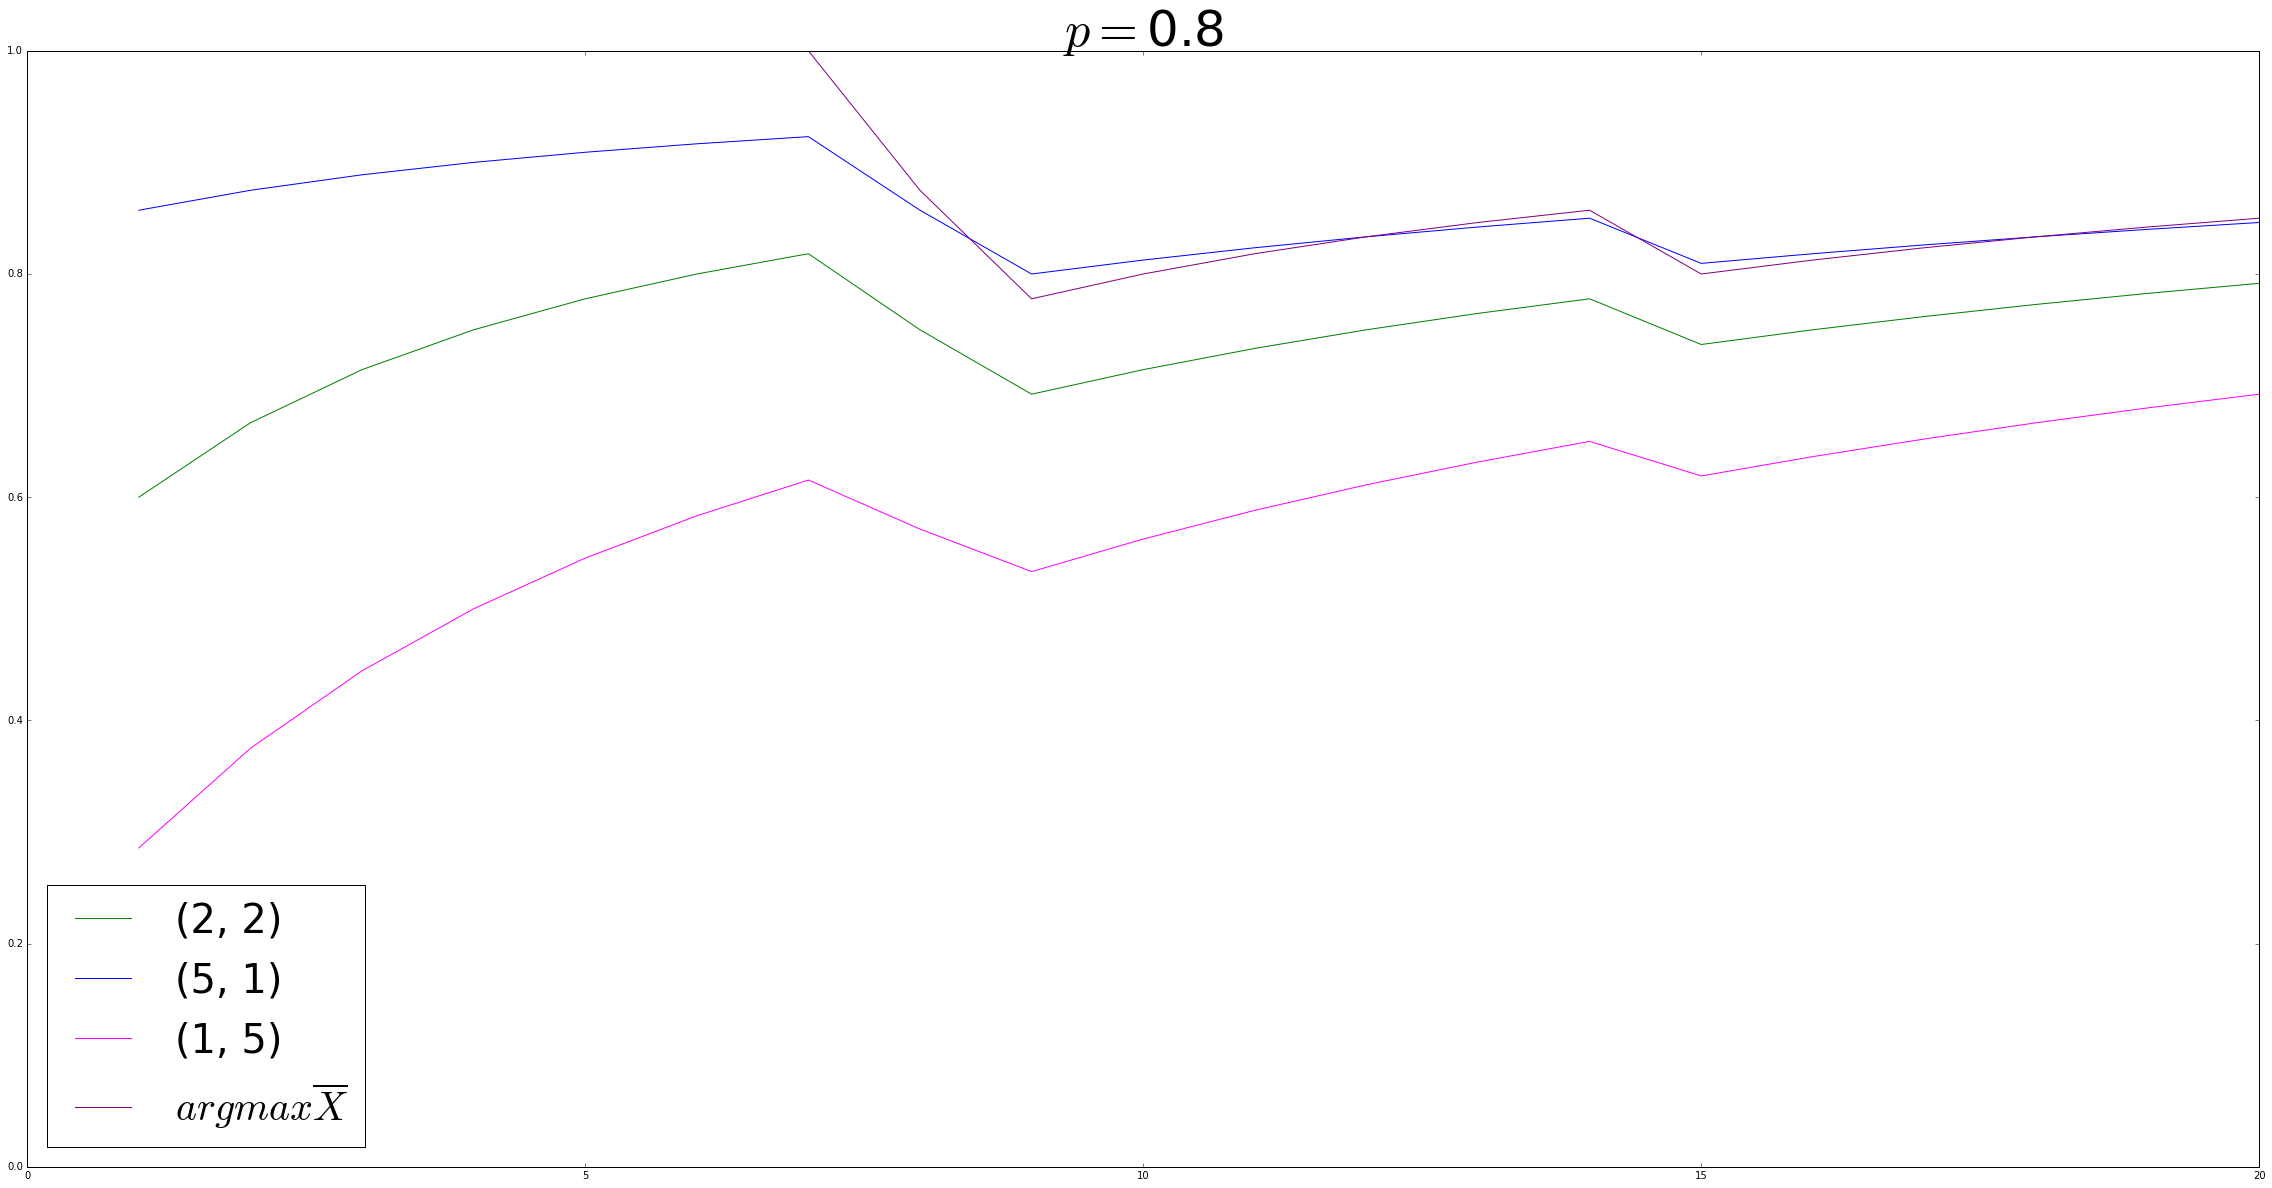

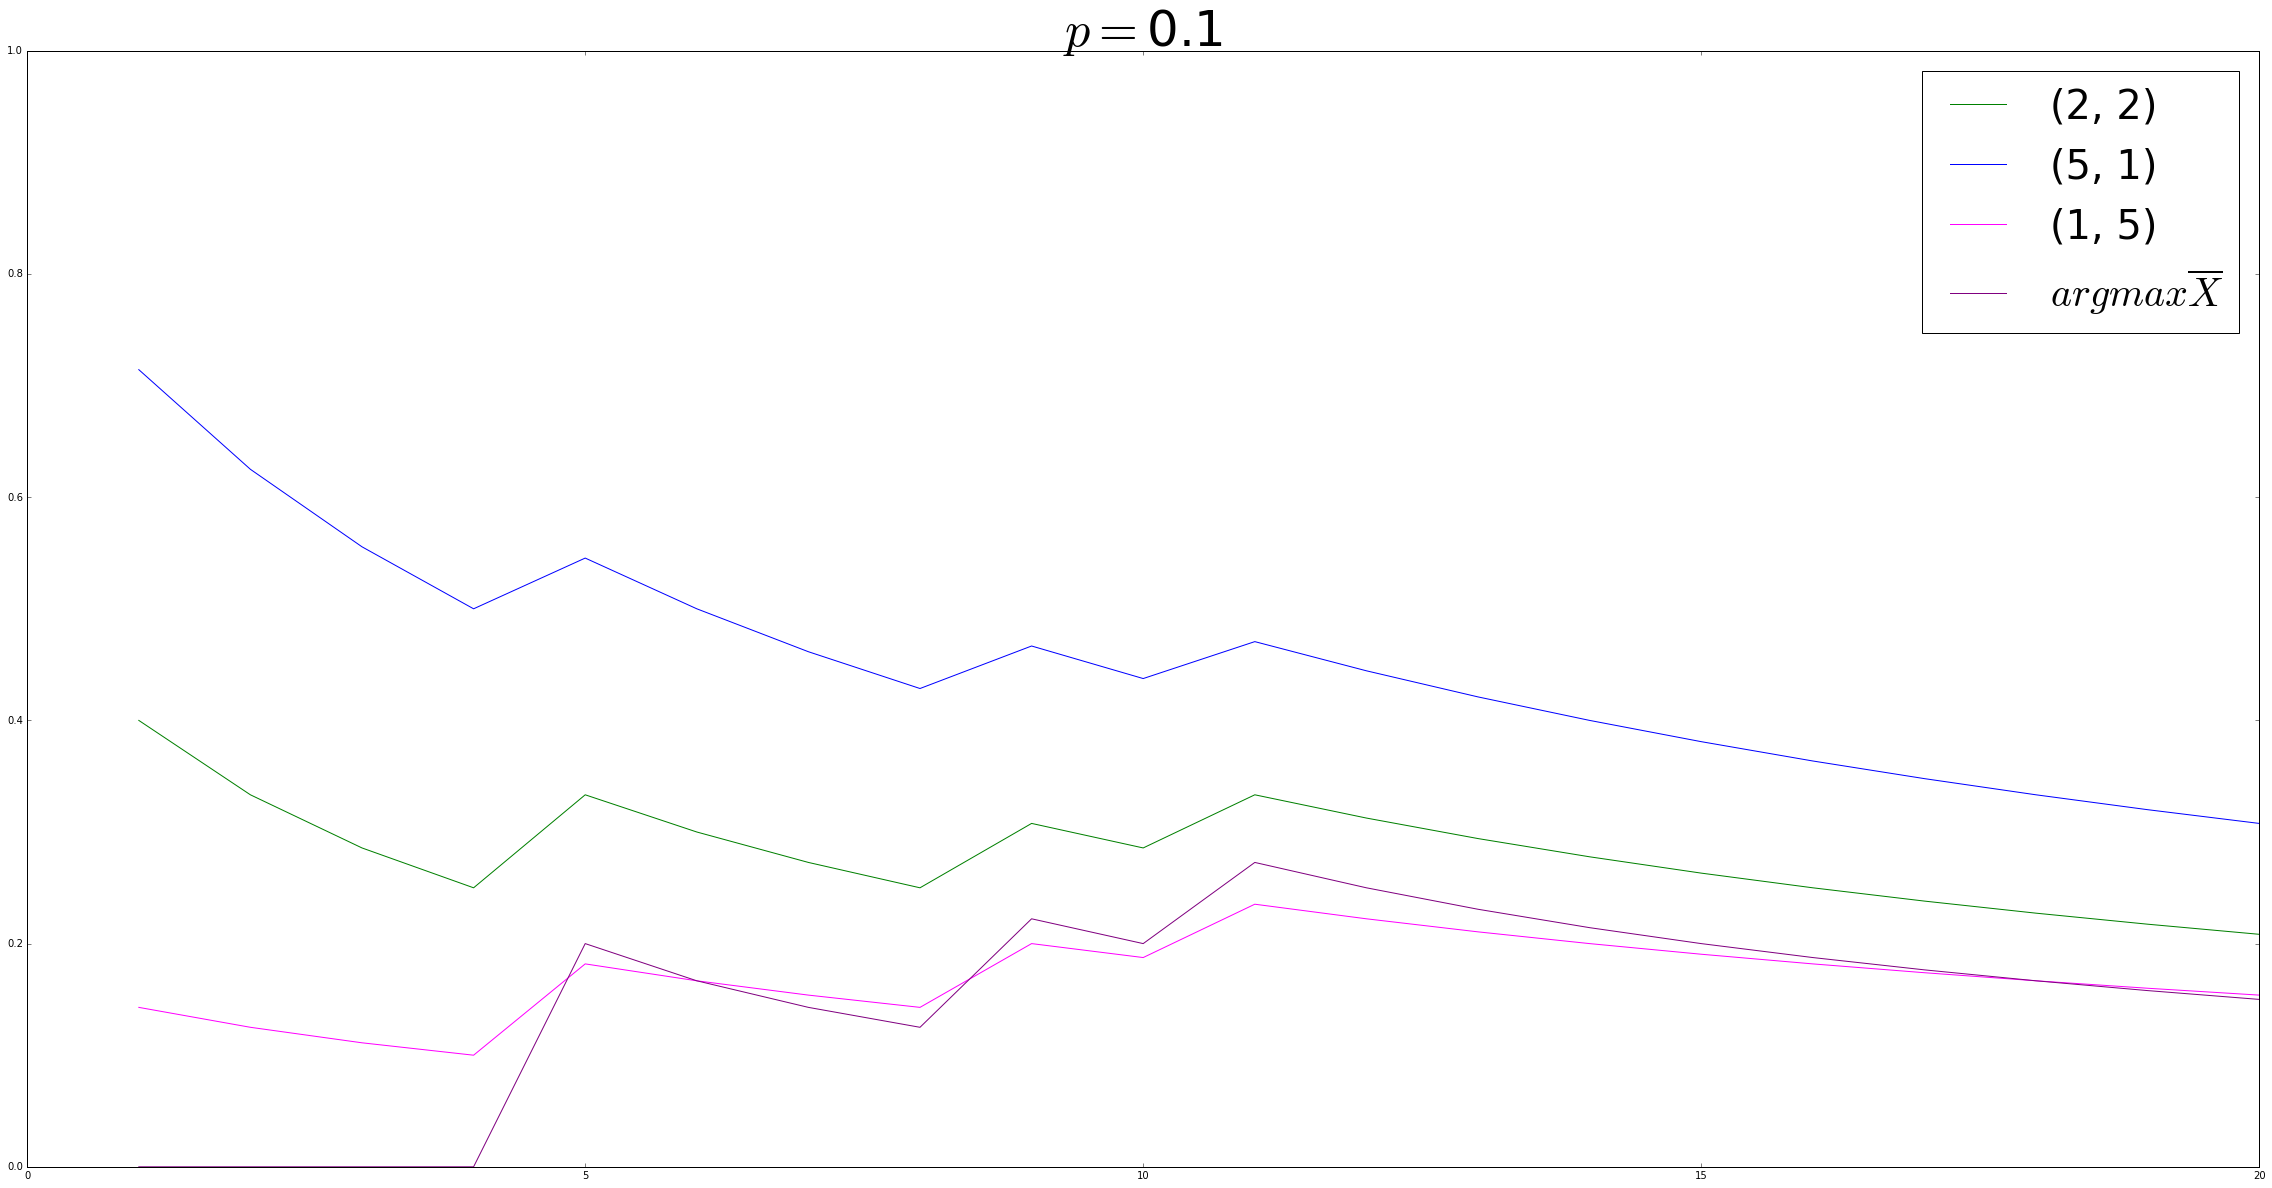

In [4]:
for probability in our_probability:
    
    plt.figure(figsize=(40,20))
    plt.title(u'$p = $' + str(probability), fontsize = 50)
    sample = sps.bernoulli.rvs(probability, size=20)
    
    ind = 0
    
    for alpha, beta in param[: 3]:
            bayesian_est = [(alpha+sum(sample[: i+1]))/(alpha + beta + i + 1 ) for i in range(20)]
            plt.plot(np.arange(1, 21), abs(np.array(bayesian_est)), color = colors[ind], 
                     label='('+str(alpha)+', '+str(beta) +')')
            ind = ind+1
            
    mark_max = [sample[: i + 1].mean() for i in range(20)]
    plt.plot(np.arange(1, 21), abs(np.array(mark_max)), color = colors[3], label='$argmax \overline{X}$')
    
    plt.legend(loc=0, fontsize=40)
    plt.ylim(0, 1)
    plt.show()        

### Мы видим, что оценка максимального правдоподобия ведет себя в любом случае хорошо, а поведение байесовской оценки зависит от параметров альфа и бета, например на первом графике, когда вероятность была равна 0.5, лучше вела себя оценка с примерно одинаковымы альфа и бета